In [152]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../kaggle_data"]).decode("utf8"))

test.csv
train.csv



In [153]:
train = pd.read_csv('../kaggle_data/train.csv')
test = pd.read_csv('../kaggle_data/test.csv')
y_train = train['target']
train = train.drop(['target'], axis=1)
print(len(train))

114321


In [154]:

train['null_count'] =  train.isnull().sum(axis=1)


In [155]:
null_count
print(null_count.value_counts())

1      28488
101    26967
0      17756
102    15262
2      14179
100     4417
3       1690
4       1377
82      1049
103      708
25       570
83       458
81       457
26       254
104      216
105       83
27        47
84        43
5         41
85        41
107       35
6         33
108       26
106       23
65        19
7         16
64        11
109        6
8          5
9          5
66         5
16         4
10         4
13         4
18         3
12         3
28         2
11         1
29         1
14         1
17         1
38         1
68         1
37         1
33         1
110        1
86         1
87         1
88         1
32         1
118        1
dtype: int64


In [156]:
train_grp1 = train[train['null_count']<10]
grp1_count = len(train_grp1)
grp1_col_nans = train_grp1.isnull().sum()/grp1_count
100*grp1_col_nans.order(ascending=False)


v113    52.852650
v30     37.323479
v56      5.439535
v31      4.352886
v3       4.352886
v102     0.990722
v21      0.507942
v22      0.360120
v112     0.100645
v131     0.067621
v78      0.067621
v69      0.067621
v115     0.067621
v16      0.067621
v87      0.053468
v105     0.053468
v98      0.039314
v125     0.025161
v12      0.022016
v50      0.022016
v34      0.022016
v40      0.022016
v10      0.022016
v70      0.012581
v51      0.007863
v119     0.007863
v85      0.007863
v123     0.007863
v23      0.007863
v80      0.006290
          ...    
v95      0.000000
v93      0.000000
v59      0.000000
v92      0.000000
v60      0.000000
v61      0.000000
v62      0.000000
v63      0.000000
v64      0.000000
v65      0.000000
v67      0.000000
v68      0.000000
v71      0.000000
v72      0.000000
v73      0.000000
v74      0.000000
v75      0.000000
v76      0.000000
v77      0.000000
v79      0.000000
v81      0.000000
v82      0.000000
v83      0.000000
v84      0.000000
v86      0

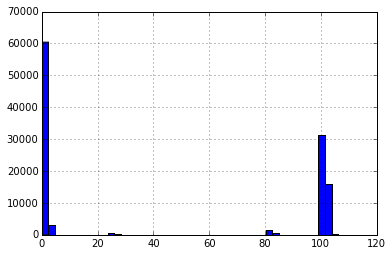

In [157]:
train['null_count'].hist(bins=50)

In [158]:
unique_value_count = train.apply(lambda x: len(pd.unique(x)), axis = 0)
train_dtypes = pd.DataFrame(train.dtypes)

In [159]:
type(unique_value_count)
type(train_dtypes)

pandas.core.frame.DataFrame

In [ ]:
train_dtypes['unique_value_count'] = unique_value_count

In [ ]:
train_meta = train_dtypes

In [ ]:
train_meta.columns.values[0]='data_type'

In [ ]:
train_meta.columns.values

In [ ]:
summary_stats = train.describe().T


In [ ]:
train_meta = summary_stats.combine_first(train_meta)

In [ ]:
train_meta['COV'] = train_meta['mean']/train_meta['std']

In [150]:
train_meta

,25%,50%,75%,count,dtype,max,mean,min,std,unique_value_count,COV
ID,57280.000000,114189.000000,171206.000000,114321,NaN,228713.000000,114228.928228,3.000000e+00,65934.487362,114321,1.732461
null_count,1.000000,2.000000,101.000000,114321,NaN,118.000000,44.589104,0.000000e+00,49.247104,51,0.905416
v1,0.913580,1.469550,2.136128,64489,NaN,20.000001,1.630686,-9.996497e-07,1.082813,64488,1.505971
v10,1.050328,1.312910,2.100657,114237,NaN,18.533916,1.883046,-9.875317e-07,1.393979,112486,1.350843
v100,5.754166,14.475939,18.317460,64485,NaN,20.000001,12.091623,-9.981311e-07,6.888297,64472,1.755386
v101,5.257973,6.623714,8.240794,64525,NaN,20.000000,6.866414,-3.942767e-07,2.354673,64526,2.916080
v102,1.793632,2.462898,3.413256,63005,NaN,20.000000,2.890289,-7.111493e-07,1.824041,62987,1.584553
v103,4.500904,5.125847,5.874545,64489,NaN,18.775251,5.296716,-9.757743e-07,1.228804,64490,4.310463
v104,2.140932,2.512034,2.948754,64489,NaN,20.000001,2.642828,-8.683169e-07,0.885769,64490,2.983655
v105,0.055565,0.242556,1.020948,65663,NaN,20.000001,1.081045,9.364981e-05,2.247308,65659,0.481040


In [151]:
train_dtypes


,dtype,unique_value_count
ID,int64,114321
v1,float64,64488
v2,float64,64525
v3,object,4
v4,float64,64525
v5,float64,65672
v6,float64,64488
v7,float64,64490
v8,float64,65689
v9,float64,64452
